In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
smoker_df = pd.read_csv("data/kaggle_smoker_dataset.csv")
smoker_df

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


In [ ]:
smoker_df.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [ ]:
#Quick descriptive statistics for each variable
smoker_df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


Categorical variables: hearing (left), hearing (right), Urine protein, dental caries, smoking

In [ ]:
import matplotlib.pyplot as plt

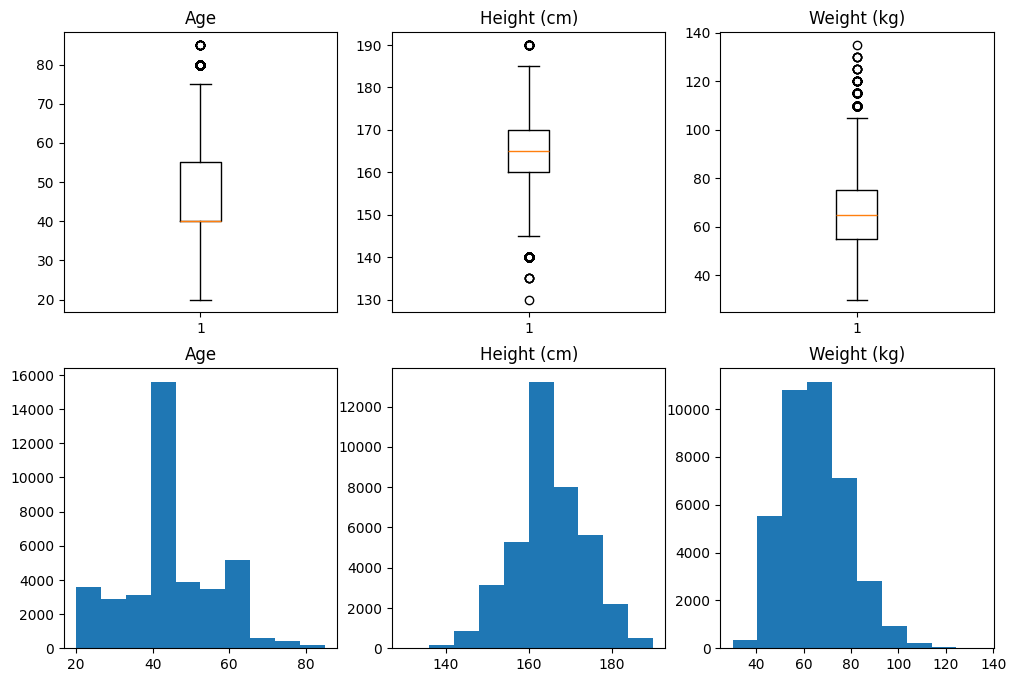

In [ ]:
#Check the distribution of each variable by generating box plots and histograms
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs[0,0].boxplot(smoker_df["age"])
axs[0,0].set_title("Age")
axs[1,0].hist(smoker_df["age"])
axs[1,0].set_title("Age")
axs[0,1].boxplot(smoker_df["height(cm)"])
axs[0,1].set_title("Height (cm)")
axs[1,1].hist(smoker_df["height(cm)"])
axs[1,1].set_title("Height (cm)")
axs[0,2].boxplot(smoker_df["weight(kg)"])
axs[0,2].set_title("Weight (kg)")
axs[1,2].hist(smoker_df["weight(kg)"])
axs[1,2].set_title("Weight (kg)")
plt.show()

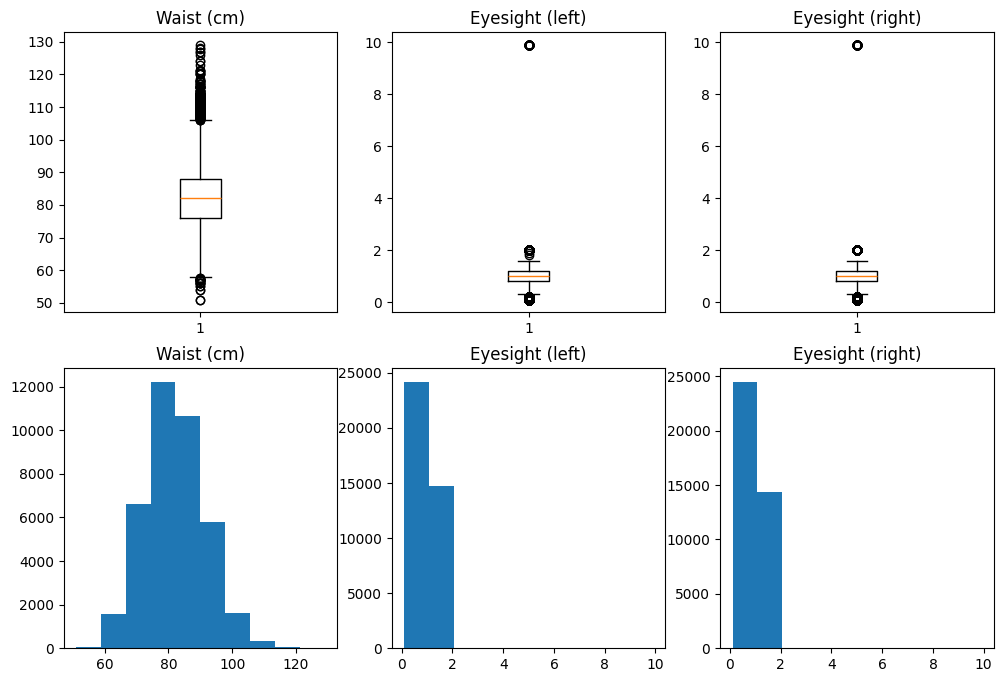

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs[0,0].boxplot(smoker_df["waist(cm)"])
axs[0,0].set_title("Waist (cm)")
axs[1,0].hist(smoker_df["waist(cm)"])
axs[1,0].set_title("Waist (cm)")
axs[0,1].boxplot(smoker_df["eyesight(left)"])
axs[0,1].set_title("Eyesight (left)")
axs[1,1].hist(smoker_df["eyesight(left)"])
axs[1,1].set_title("Eyesight (left)")
axs[0,2].boxplot(smoker_df["eyesight(right)"])
axs[0,2].set_title("Eyesight (right)")
axs[1,2].hist(smoker_df["eyesight(right)"])
axs[1,2].set_title("Eyesight (right)")
plt.show()

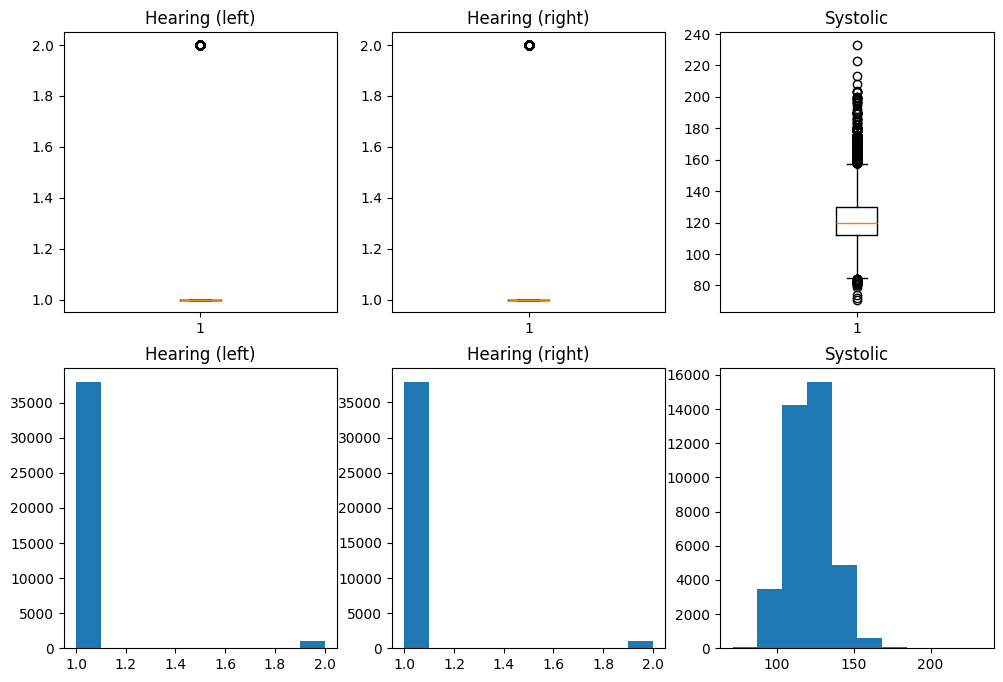

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs[0,0].boxplot(smoker_df["hearing(left)"])
axs[0,0].set_title("Hearing (left)")
axs[1,0].hist(smoker_df["hearing(left)"])
axs[1,0].set_title("Hearing (left)")
axs[0,1].boxplot(smoker_df["hearing(right)"])
axs[0,1].set_title("Hearing (right)")
axs[1,1].hist(smoker_df["hearing(right)"])
axs[1,1].set_title("Hearing (right)")
axs[0,2].boxplot(smoker_df["systolic"])
axs[0,2].set_title("Systolic")
axs[1,2].hist(smoker_df["systolic"])
axs[1,2].set_title("Systolic")
plt.show()

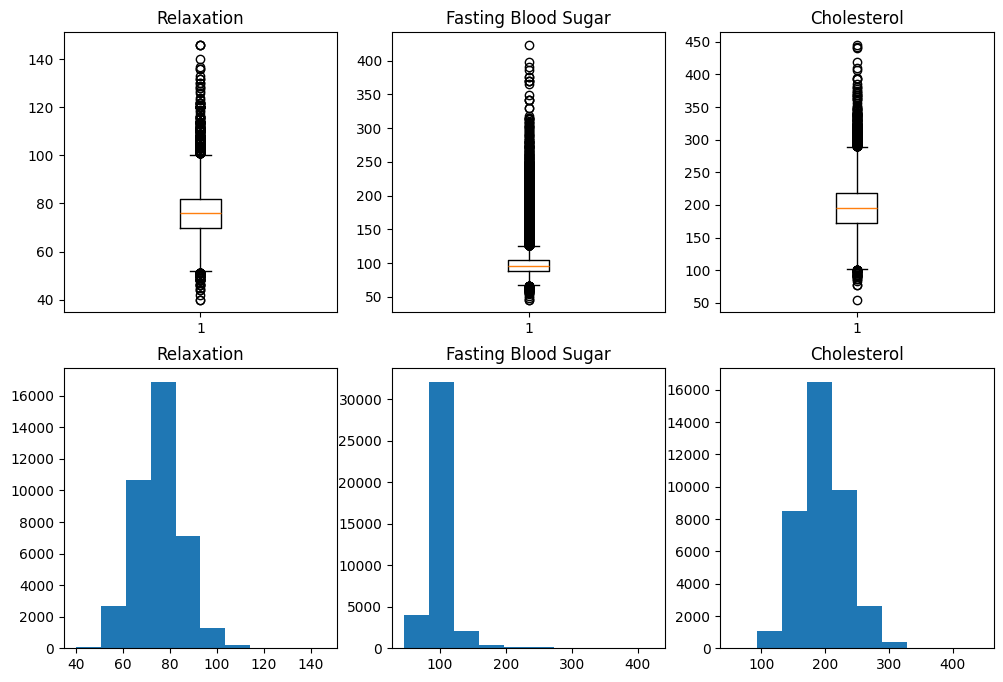

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs[0,0].boxplot(smoker_df["relaxation"])
axs[0,0].set_title("Relaxation")
axs[1,0].hist(smoker_df["relaxation"])
axs[1,0].set_title("Relaxation")
axs[0,1].boxplot(smoker_df["fasting blood sugar"])
axs[0,1].set_title("Fasting Blood Sugar")
axs[1,1].hist(smoker_df["fasting blood sugar"])
axs[1,1].set_title("Fasting Blood Sugar")
axs[0,2].boxplot(smoker_df["Cholesterol"])
axs[0,2].set_title("Cholesterol")
axs[1,2].hist(smoker_df["Cholesterol"])
axs[1,2].set_title("Cholesterol")
plt.show()

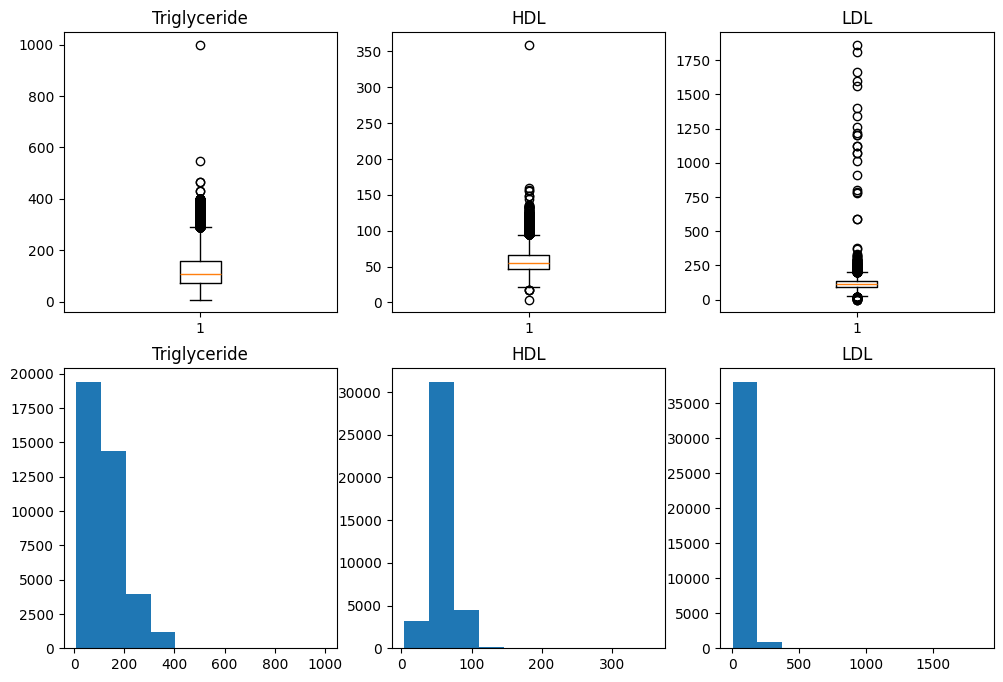

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs[0,0].boxplot(smoker_df["triglyceride"])
axs[0,0].set_title("Triglyceride")
axs[1,0].hist(smoker_df["triglyceride"])
axs[1,0].set_title("Triglyceride")
axs[0,1].boxplot(smoker_df["HDL"])
axs[0,1].set_title("HDL")
axs[1,1].hist(smoker_df["HDL"])
axs[1,1].set_title("HDL")
axs[0,2].boxplot(smoker_df["LDL"])
axs[0,2].set_title("LDL")
axs[1,2].hist(smoker_df["LDL"])
axs[1,2].set_title("LDL")
plt.show()

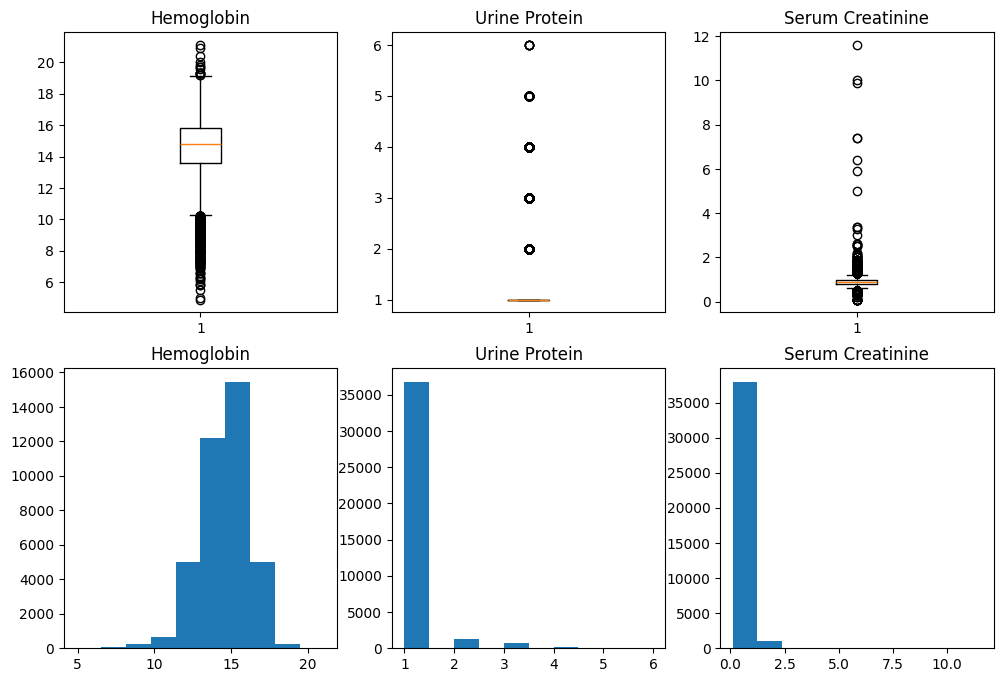

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs[0,0].boxplot(smoker_df["hemoglobin"])
axs[0,0].set_title("Hemoglobin")
axs[1,0].hist(smoker_df["hemoglobin"])
axs[1,0].set_title("Hemoglobin")
axs[0,1].boxplot(smoker_df["Urine protein"])
axs[0,1].set_title("Urine Protein")
axs[1,1].hist(smoker_df["Urine protein"])
axs[1,1].set_title("Urine Protein")
axs[0,2].boxplot(smoker_df["serum creatinine"])
axs[0,2].set_title("Serum Creatinine")
axs[1,2].hist(smoker_df["serum creatinine"])
axs[1,2].set_title("Serum Creatinine")
plt.show()

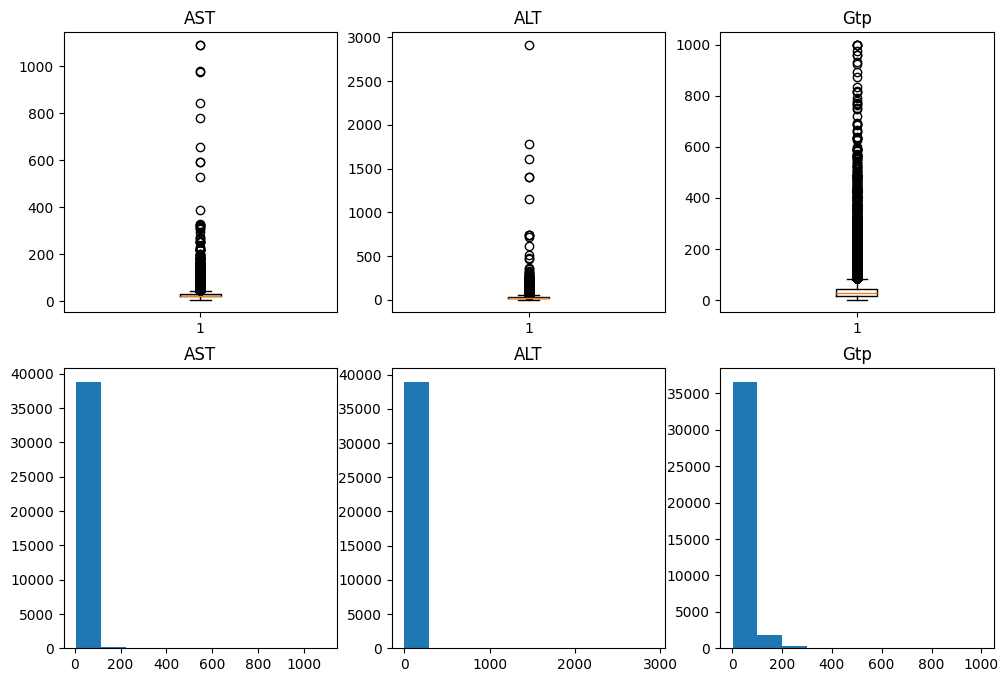

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(12,8))
axs[0,0].boxplot(smoker_df["AST"])
axs[0,0].set_title("AST")
axs[1,0].hist(smoker_df["AST"])
axs[1,0].set_title("AST")
axs[0,1].boxplot(smoker_df["ALT"])
axs[0,1].set_title("ALT")
axs[1,1].hist(smoker_df["ALT"])
axs[1,1].set_title("ALT")
axs[0,2].boxplot(smoker_df["Gtp"])
axs[0,2].set_title("Gtp")
axs[1,2].hist(smoker_df["Gtp"])
axs[1,2].set_title("Gtp")
plt.show()

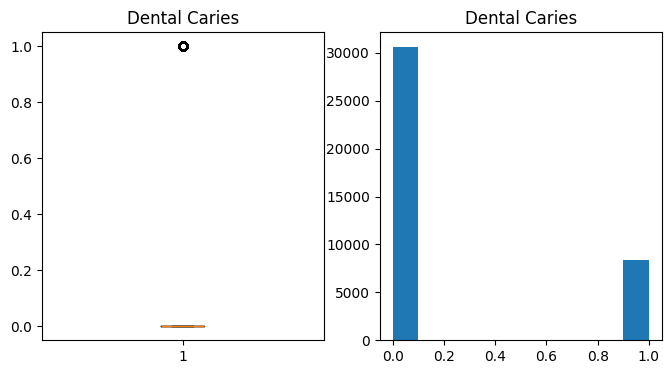

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(8,4))
axs[0].boxplot(smoker_df["dental caries"])
axs[0].set_title("Dental Caries")
axs[1].hist(smoker_df["dental caries"])
axs[1].set_title("Dental Caries")
plt.show()

*Note:*

We can remove the graphs for the categorical variables as they just have binary values or categories represented by integers.

Instead, we can check the value counts for these variables.

In [ ]:
smoker_df["hearing(left)"].value_counts()

hearing(left)
1    37995
2      989
Name: count, dtype: int64

In [ ]:
smoker_df["hearing(right)"].value_counts()

hearing(right)
1    37963
2     1021
Name: count, dtype: int64

In [ ]:
smoker_df["Urine protein"].value_counts()

Urine protein
1    36836
2     1236
3      667
4      182
5       58
6        5
Name: count, dtype: int64

In [ ]:
smoker_df["dental caries"].value_counts()

dental caries
0    30625
1     8359
Name: count, dtype: int64

In [ ]:
smoker_df["smoking"].value_counts()

smoking
0    24666
1    14318
Name: count, dtype: int64

*Note:*  We could maybe check cross tabulations with the smoker variable and chart those values.

In [ ]:
#Create a correlation matrix to see how closely our variables are correlated
smoker_corr = smoker_df.corr()
smoker_corr

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
age,1.000000,-0.480666,-0.325445,-0.027419,-0.186048,-0.191045,0.201258,0.206989,0.133009,0.048424,...,0.008923,0.042255,-0.264107,0.028729,-0.104297,0.026727,-0.068616,0.009627,-0.112156,-0.166268
height(cm),-0.480666,1.000000,0.673710,0.377978,0.146796,0.157524,-0.081996,-0.080124,0.081973,0.113592,...,-0.216711,-0.045275,0.536739,0.003835,0.382347,0.047100,0.131799,0.138580,0.082897,0.394314
weight(kg),-0.325445,0.673710,1.000000,0.824865,0.104331,0.114800,-0.052348,-0.054221,0.270197,0.274634,...,-0.364375,0.039076,0.491503,0.028585,0.321743,0.127032,0.254892,0.210211,0.077194,0.299347
waist(cm),-0.027419,0.377978,0.824865,1.000000,0.028536,0.040844,0.020999,0.018157,0.321100,0.294253,...,-0.379485,0.070866,0.383733,0.042668,0.232145,0.144963,0.253520,0.240621,0.049180,0.223359
eyesight(left),-0.186048,0.146796,0.104331,0.028536,1.000000,0.334762,-0.043780,-0.043648,-0.012667,0.007585,...,-0.017559,-0.009884,0.095224,-0.009065,0.056310,-0.006577,0.020873,0.003528,0.005754,0.059409
eyesight(right),-0.191045,0.157524,0.114800,0.040844,0.334762,1.000000,-0.037717,-0.034659,-0.005553,0.017180,...,-0.024109,-0.008818,0.097060,-0.013070,0.046782,-0.003052,0.027368,0.018354,0.016101,0.064587
hearing(left),0.201258,-0.081996,-0.052348,0.020999,-0.043780,-0.037717,1.000000,0.517993,0.053251,0.005802,...,-0.018871,-0.018593,-0.030658,0.017619,0.002230,0.008481,-0.001399,0.008732,-0.019501,-0.022077
hearing(right),0.206989,-0.080124,-0.054221,0.018157,-0.043648,-0.034659,0.517993,1.000000,0.046343,-0.002932,...,-0.012607,-0.017691,-0.032921,0.021036,0.006526,0.010484,-0.001063,0.004224,-0.016799,-0.018990
systolic,0.133009,0.081973,0.270197,0.321100,-0.012667,-0.005553,0.053251,0.046343,1.000000,0.759041,...,-0.086150,0.015755,0.188036,0.048702,0.075509,0.084637,0.094791,0.168911,0.033429,0.070176
relaxation,0.048424,0.113592,0.274634,0.294253,0.007585,0.017180,0.005802,-0.002932,0.759041,1.000000,...,-0.090218,0.036990,0.236117,0.050123,0.090850,0.086320,0.106225,0.176851,0.035666,0.103663


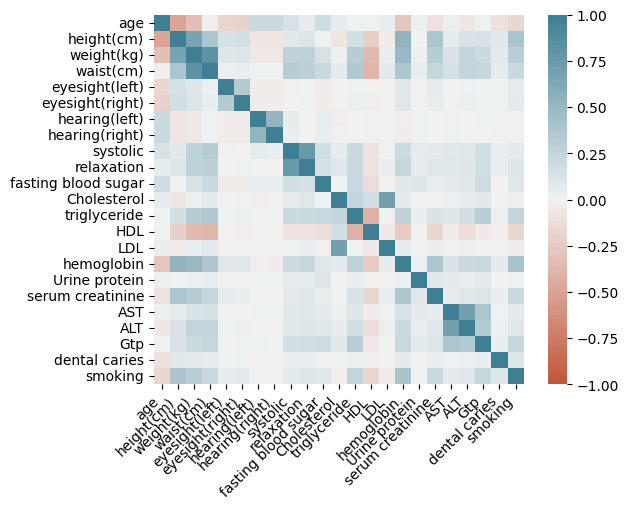

In [ ]:
#Create a heatmap to represent the correlation matrix
import seaborn as sns
ax = sns.heatmap(
    smoker_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Note: We can update the above matrix to exclude smoking and the other categorical variables

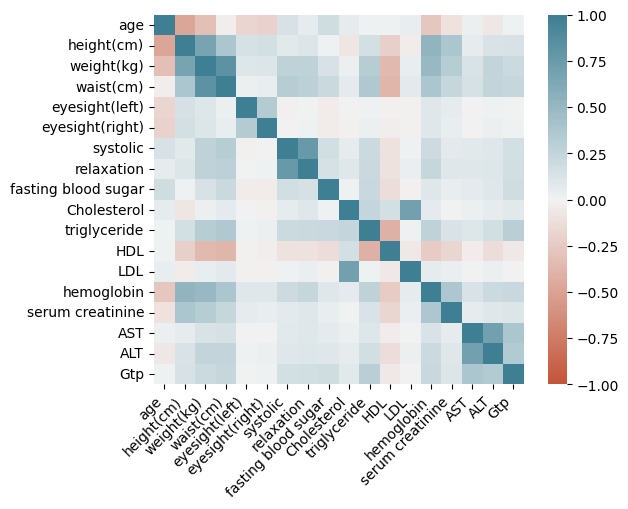

In [ ]:
#Create another correlation matrix heatmap - this time only using the numerical variables
smoker_nums = smoker_df[["age","height(cm)","weight(kg)","waist(cm)","eyesight(left)","eyesight(right)",
                              "systolic","relaxation","fasting blood sugar","Cholesterol","triglyceride",
                              "HDL","LDL","hemoglobin","serum creatinine","AST","ALT","Gtp"]]
smoker_nums_corr = smoker_nums.corr()
ax_nums = sns.heatmap(smoker_nums_corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax_nums.set_xticklabels(ax_nums.get_xticklabels(), rotation=45, horizontalalignment='right');

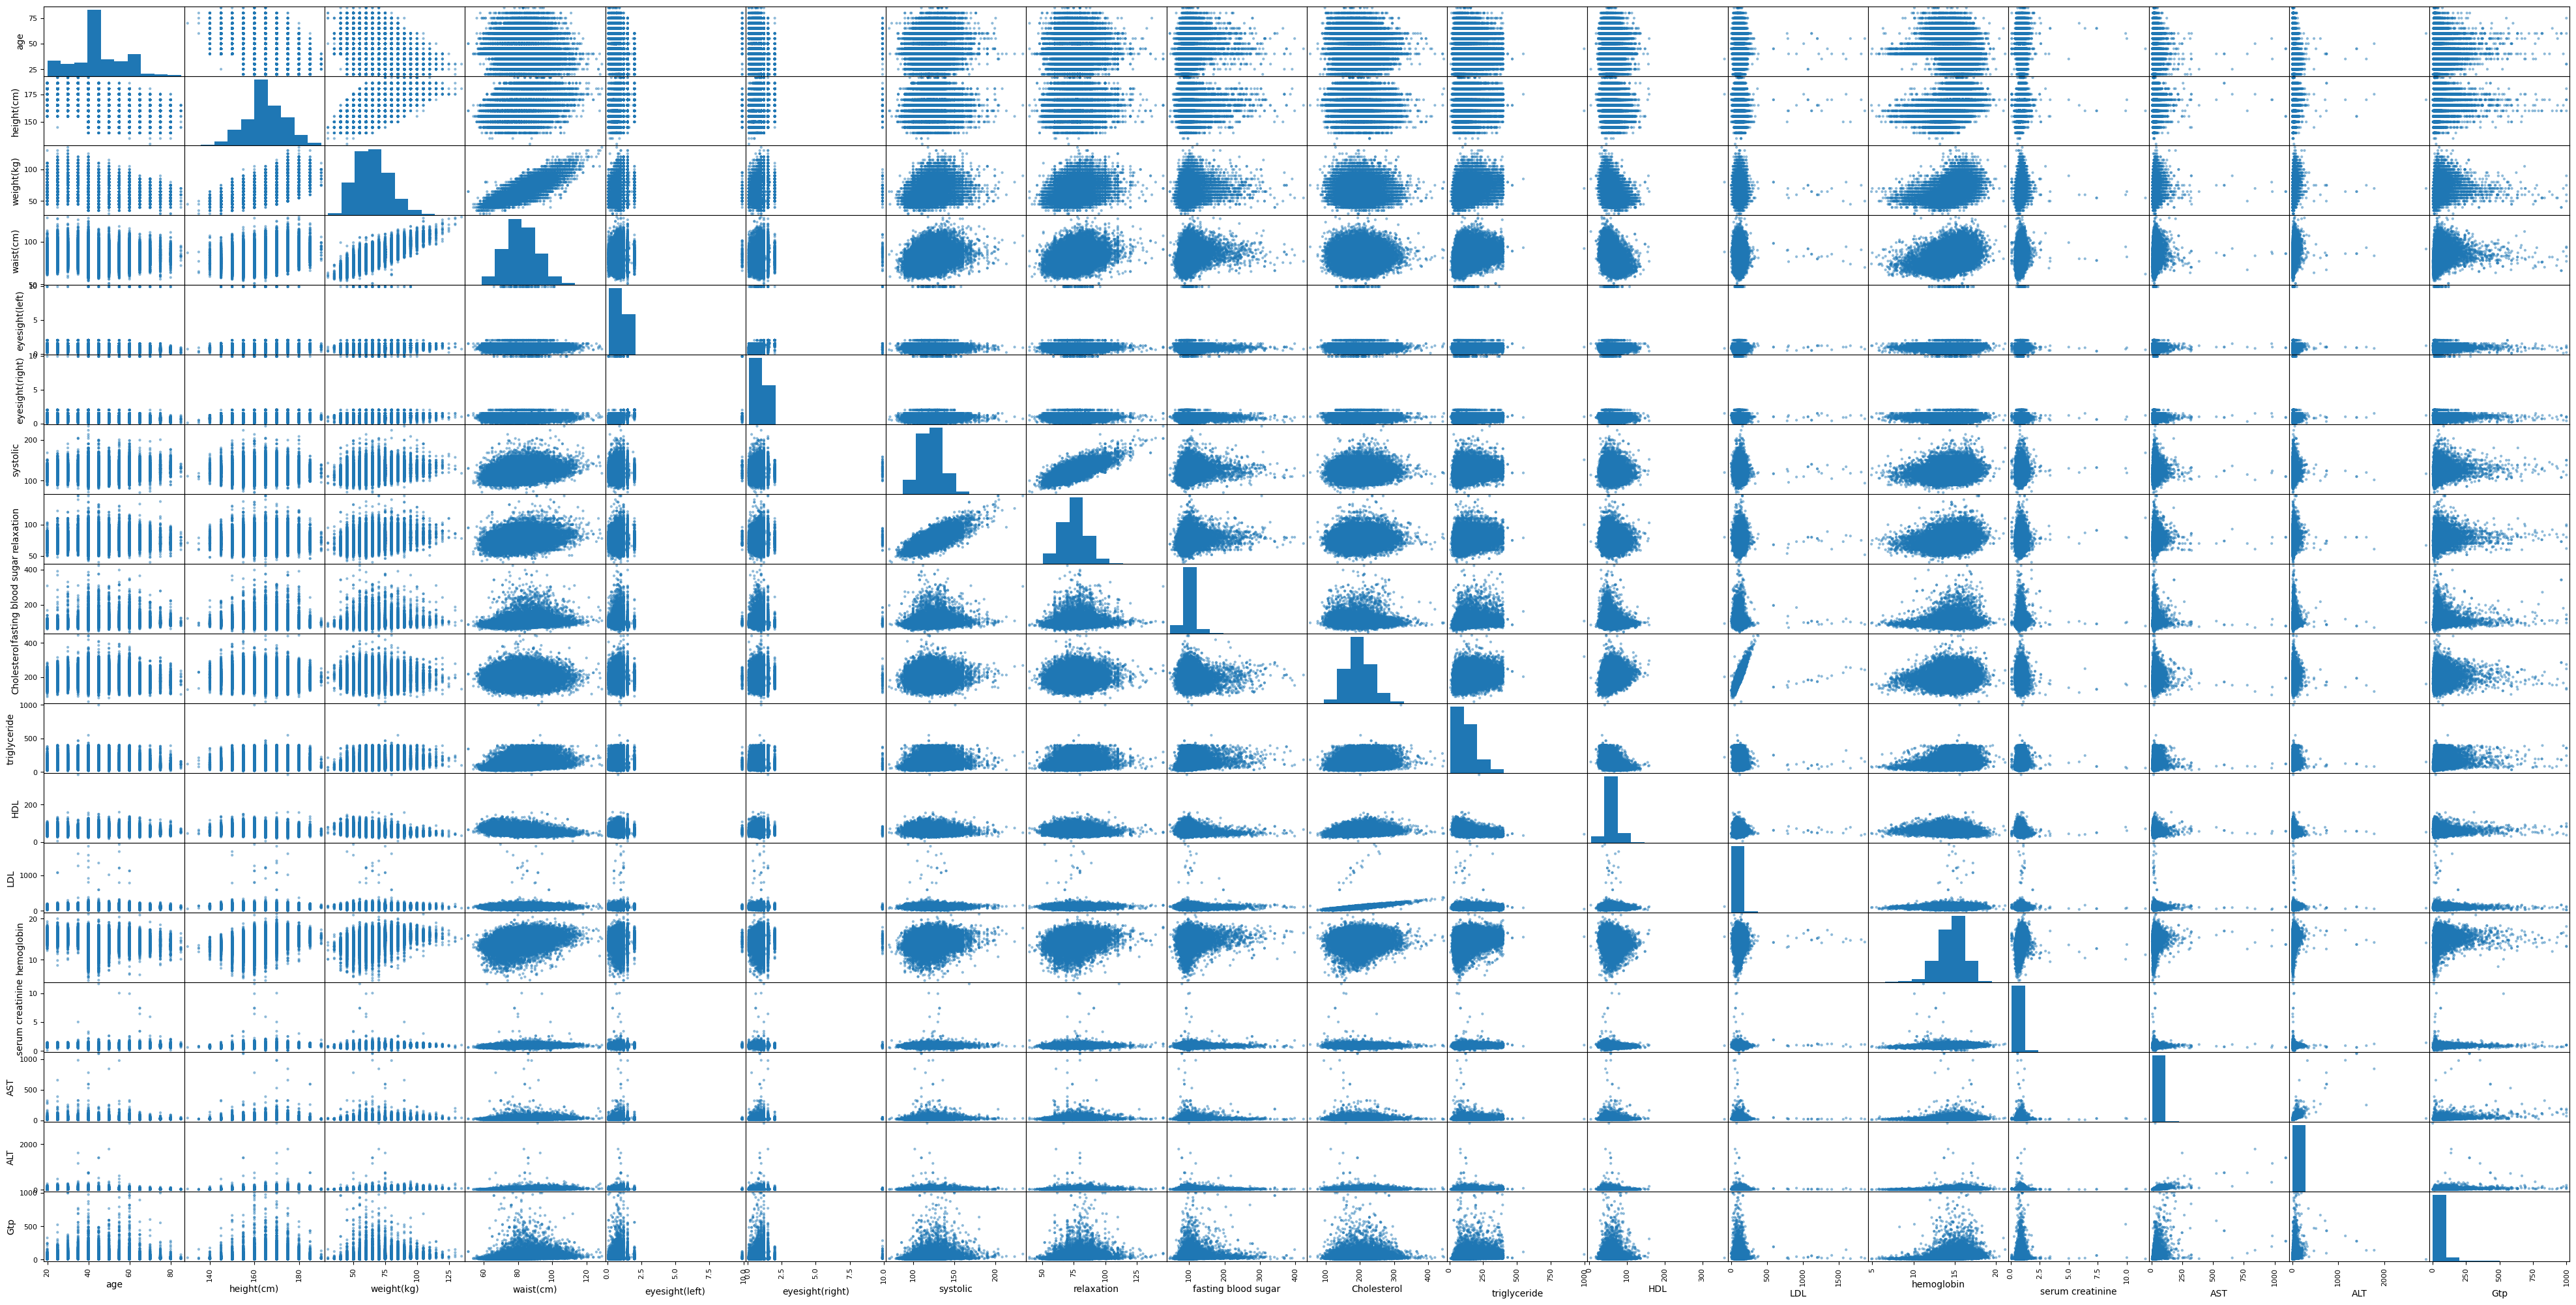

In [ ]:
#Create scatter plot matrix with all the numerical variables in our dataset
pd.plotting.scatter_matrix(smoker_nums, figsize=(50,25), diagonal="hist");

*Note:* The scatter matrix is way too crowded. Could be useful to revist after completing feature selection/reduction.

## Unsupervised learning - Cluster to see natural grouping of data

In [ ]:
# if cell is ran twice it will fail - try excepts handles that error
try:
    labels_df = smoker_df["smoking"]
    smoker_df.drop(["smoking"], axis=1, inplace=True)
except KeyError as e:
    pass

label_names = ["non-smoker", "smoker"] # 0 = non-smoker and 1 = smoker

In [ ]:
# Min-Max scaling
min_max_scaler = MinMaxScaler()
smoker_df_scaled = min_max_scaler.fit_transform(smoker_df)

In [ ]:
def kmeans_find_k(data:np.ndarray):
  """
  Helper function to find optimal number of k in kmeans
  """
  # Determine the range of k values to try
  k_range = range(2, 10)

  # Initialize lists to store silhouette scores and within-cluster sum of squares
  silhouette_scores = []
  wcss = []

  # Calculate silhouette score and WCSS for different values of k
  for k in k_range:
      kmeans = KMeans(n_clusters=k, n_init=10) #supress warning by setting n_init=10 (aka default)
      kmeans.fit(data)
      labels = kmeans.labels_
      silhouette_scores.append(silhouette_score(data, labels))
      wcss.append(kmeans.inertia_)

  # Plot silhouette scores
  plt.subplot(2, 1, 1)
  plt.plot(k_range, silhouette_scores, 'bx-')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Silhouette Score')
  plt.title('Silhouette Score for each k')

  # Plot elbow method graph
  plt.subplot(2, 1, 2)
  plt.plot(k_range, wcss, 'ro-')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Within-cluster sum of squares (WCSS)')
  plt.title('Elbow Method')

  plt.tight_layout()
  plt.show()

  return

In [ ]:
def kmeans(k:int, data, labels):
  """
  Helper function to conduct kmeans clustering and eval
  """
  # Define the number of clusters
  kmeans = KMeans(n_clusters=k, n_init=10)

  # Fit the model to the data
  kmeans.fit(data)

  #calculate homogeneity
  homogeneity = homogeneity_score(labels , kmeans.labels_)
  print("Homogeneity Score:", homogeneity)

  return

### Kmeans clustering

#### Find the optimal number of clusters on normalized data

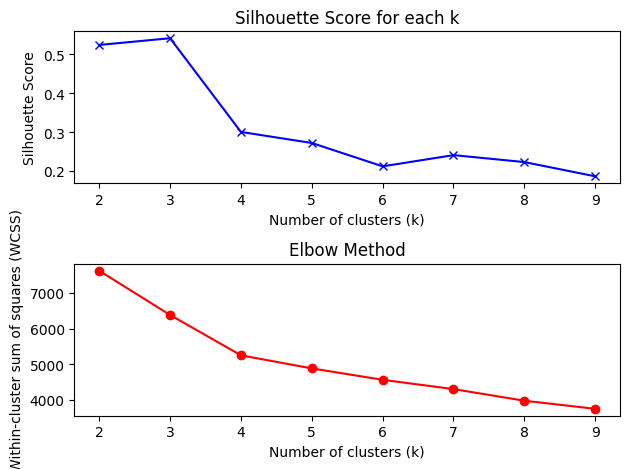

In [ ]:
kmeans_find_k(smoker_df_scaled)

Based on silhouette score k=2 or k=3 is optimal number of clusters. Although k=3 has a lower WCSS. In the graph of WCSS there is an elbow at k=4, so based on that graph the optimal number of clusters is 4. It is interesting to see an optimal number of clusters matches the number of labels. I am going to use k=2 to see if points in clusters have the same label.

#### Use k=2 for Kmeans

In [ ]:
kmeans(2, smoker_df_scaled, labels_df)

Homogeneity Score: 0.008621428098178991


#### Use k=3 for Kmeans

In [ ]:
kmeans(3, smoker_df_scaled, labels_df)

Homogeneity Score: 0.0904255924882165


This suggests that for both k-values failed to separate the data into distinct clusters corresponding to the different classes or labels.

### Apply PCA to Plot in 2D Plane

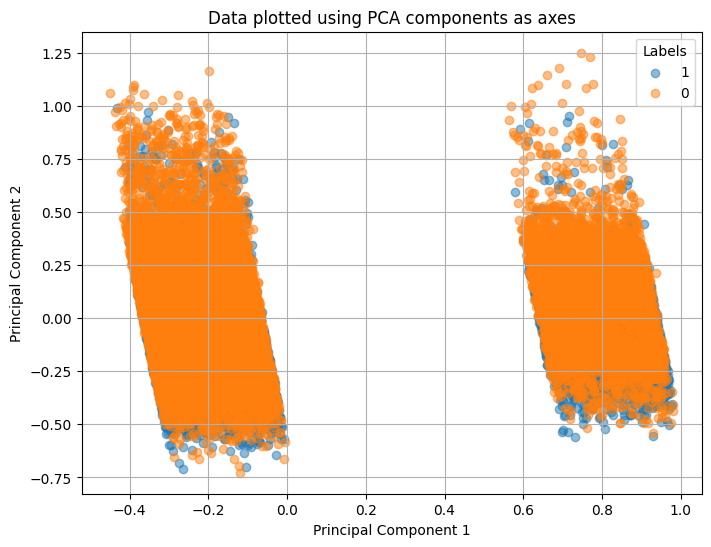

In [ ]:
pca = PCA(n_components=2) #use two to be able to plot

# Fit PCA to the data and transform the data
smoker_df_pca = pca.fit_transform(smoker_df_scaled)

#convert to str
temp = labels_df.astype('category')

# Get unique labels
unique_labels = temp.unique()

# Plot with jitter
jitter_amount = 0.15
plt.figure(figsize=(8, 6))
for label in unique_labels:
    indices = temp == label
    jitter = np.random.uniform(low=-jitter_amount, high=jitter_amount, size=(indices.sum(),))
    plt.scatter(smoker_df_pca[indices, 0] + jitter, smoker_df_pca[indices, 1], label=label, alpha=0.5)
plt.title('Data plotted using PCA components as axes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Labels', loc='best')
plt.grid(True)
plt.show()

In 2d plane, the data is linearly seperable but the labels are mixing with each other so it wont be affected to use something like SVM to predict the labels using 2 PCA components. Altough, since its seperable it leads to me believe there is a structure here that SVM will be able to seperate using more dimensions